## Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data=pd.read_csv('cdata.csv')

In [52]:
data.head()

,Fat,Protein,Carbs,Calories
0,13,6,41,307.0
1,11,4,53,330.0
2,4,6,80,377.0
3,2,8,46,232.0
4,9,7,41,273.0


## Training the data

In [30]:
from sklearn.model_selection import train_test_split
splitRatio = 0.2

train , test = train_test_split(data,test_size = splitRatio,random_state = 123)

X_train = train[[x for x in train.columns if x not in ["Calories"]]]
y_train = train[["Calories"]]

X_test  = test[[x for x in test.columns if x not in ["Calories"]]]
y_test  = test[["Calories"]]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
new=LinearRegression()
new.fit(X_train,y_train)
prediction=new.predict(X_test)

Text(0, 0.5, 'Predicted Y')

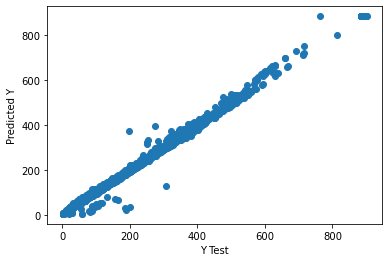

In [32]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [33]:
print('Variance score: %.2f' % r2_score(y_test, prediction))

Variance score: 0.99


In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 6.30352486020523
MSE: 150.59762089185807
RMSE: 12.271822231920494


In [35]:
new_df = pd.DataFrame([[13,6,41]])
prediction = new.predict(new_df)
print(prediction.astype(int))

[[298]]


In [36]:
new_df = pd.read_csv('inval.csv',encoding='latin1')
prediction = new.predict(new_df)
print(prediction.astype(int))

[[298]
 [318]
 [368]
 ...
 [254]
 [274]
 [883]]


In [37]:
out=pd.DataFrame(prediction, columns=['Calories'])
out.to_csv('outcal1.csv',index=False, header=True)

In [38]:
data = data[['Fat','Protein','Carbs']]
data.head()

,Fat,Protein,Carbs
0,13,6,41
1,11,4,53
2,4,6,80
3,2,8,46
4,9,7,41


In [39]:
data.to_csv('nutri.csv', index=False)

In [40]:
c1 = pd.read_csv('nutri.csv')

In [41]:
c2 = pd.read_csv('outcal1.csv')

In [42]:
comb = pd.concat([c1, c2], axis = 1)

In [43]:
comb.head()

,Fat,Protein,Carbs,Calories
0,13.0,6.0,41.0,298.498153
1,11.0,4.0,53.0,318.622131
2,4.0,6.0,80.0,368.199924
3,2.0,8.0,46.0,228.907491
4,9.0,7.0,41.0,267.355048


In [44]:
comb.to_csv('finalpred.csv',index=False)

In [45]:
pred=pd.read_csv('finalpred.csv')

In [46]:
pred.head()

,Fat,Protein,Carbs,Calories
0,13.0,6.0,41.0,298.498153
1,11.0,4.0,53.0,318.622131
2,4.0,6.0,80.0,368.199924
3,2.0,8.0,46.0,228.907491
4,9.0,7.0,41.0,267.355048
